In [3]:
import pandas as pd

In [5]:
df = pd.read_csv('fake_reg.csv')

In [6]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


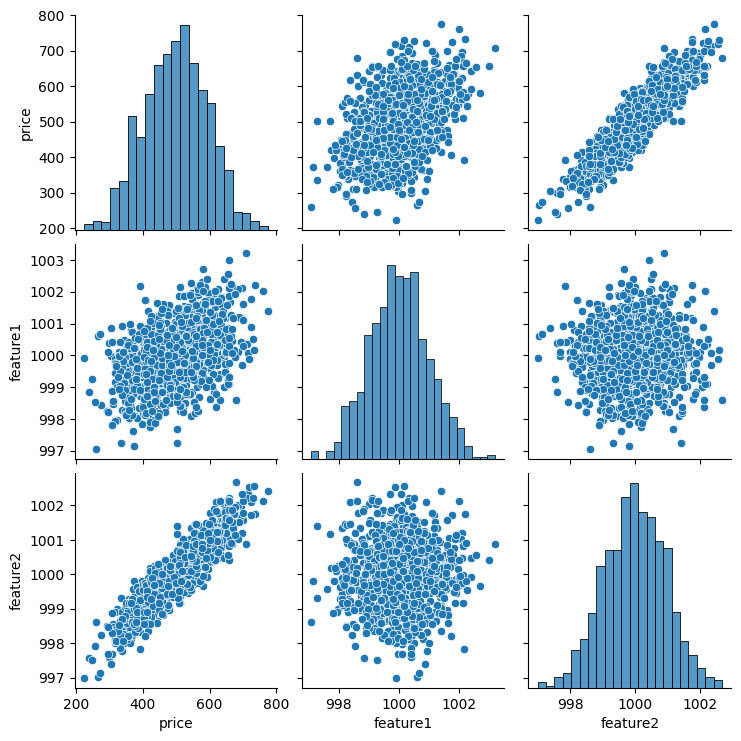

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df[['feature1', 'feature2']].values

In [10]:
y = df[['price']].values

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
X_train.shape

(700, 2)

In [13]:
X_test.shape

(300, 2)

In [14]:
y_train.shape

(700, 1)

In [15]:
y_test.shape

(300, 1)

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bo

In [24]:
scaler = MinMaxScaler()

In [26]:
scaler.fit(X_train)

MinMaxScaler()

In [27]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [29]:
help(Sequential)

Help on class Sequential in module keras.engine.sequential:

class Sequential(keras.engine.functional.Functional)
 |  Sequential(layers=None, name=None)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(tf.keras.layers.Dense(4))
 |  
 |  # This is identical to the following:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(shape=(16,)))
 |  model.add(tf.keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the `input_shape` argument.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = tf.keras.Se

In [31]:
model = Sequential([
    Dense(units=2),
    Dense(units=2),
    Dense(units=2)
])

In [35]:
model = Sequential()

In [37]:
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))


In [38]:
model.add(Dense(1))

In [39]:
model.compile(optimizer='rmsprop', loss='mse')

In [40]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [42]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
model.compile(optimizer='rmsprop', loss='mse')

In [46]:
model.fit(X_train, y_train, epochs=250)

Epoch 1/250
22/22 [==============================] - 4s 16ms/step - loss: 256708.2969
Epoch 2/250
22/22 [==============================] - 0s 13ms/step - loss: 256659.5938
Epoch 3/250
22/22 [==============================] - 0s 11ms/step - loss: 256613.8281
Epoch 4/250
22/22 [==============================] - 0s 11ms/step - loss: 256567.0781
Epoch 5/250
22/22 [==============================] - 0s 10ms/step - loss: 256518.3281
Epoch 6/250
22/22 [==============================] - 0s 12ms/step - loss: 256467.4062
Epoch 7/250
22/22 [==============================] - 0s 11ms/step - loss: 256414.5312
Epoch 8/250
22/22 [==============================] - 0s 13ms/step - loss: 256359.7031
Epoch 9/250
22/22 [==============================] - 0s 11ms/step - loss: 256303.0781
Epoch 10/250
22/22 [==============================] - 0s 11ms/step - loss: 256244.1406
Epoch 11/250
22/22 [==============================] - 0s 11ms/step - loss: 256181.2344
Epoch 12/250
22/22 [==============================] 

In [47]:
loss = model.history.history['loss']

Text(0.5, 1.0, 'Perte sur le set d entrainement par Epoch')

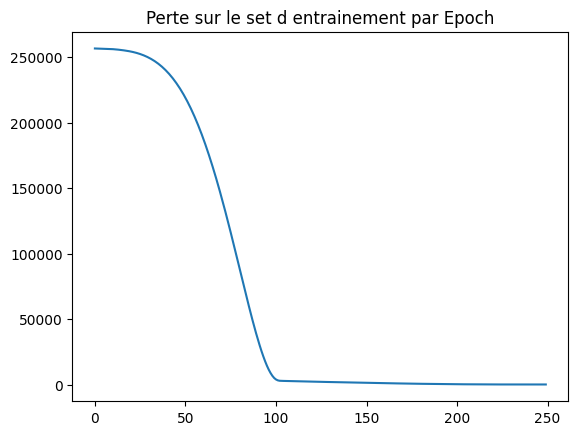

In [48]:
sns.lineplot(x=range(len(loss)), y=loss)
plt.title('Perte sur le set d entrainement par Epoch')

In [49]:
model.metrics_names

['loss']

In [50]:
training_score = model.evaluate(X_train, y_train, verbose=0)
test_score = model.evaluate(X_test, y_test, verbose=0)

In [51]:
training_score

25.774763107299805

In [52]:
test_score

28.30876922607422

In [53]:
test_prediction = model.predict(X_test)

10/10 [==============================] - 0s 4ms/step


In [54]:
pred_df = pd.DataFrame(y_test, columns=['Test Y'])

In [55]:
test_predictions = pd.Series(test_prediction.reshape(300,))

In [56]:
pred_df = pd.concat([pred_df, test_predictions], axis=1)

In [57]:
pred_df.columns = ['Test Y', 'Model Predictions']

<AxesSubplot: xlabel='Test Y', ylabel='Model Predictions'>

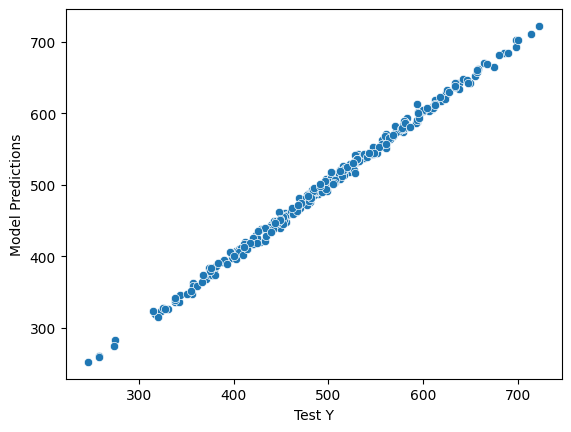

In [58]:
sns.scatterplot(x='Test Y', y='Model Predictions', data=pred_df)

In [59]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']

C:\Users\ghsts\AppData\Local\Temp\ipykernel_23248\876855887.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred_df['Error'], bins=50)


<AxesSubplot: xlabel='Error', ylabel='Density'>

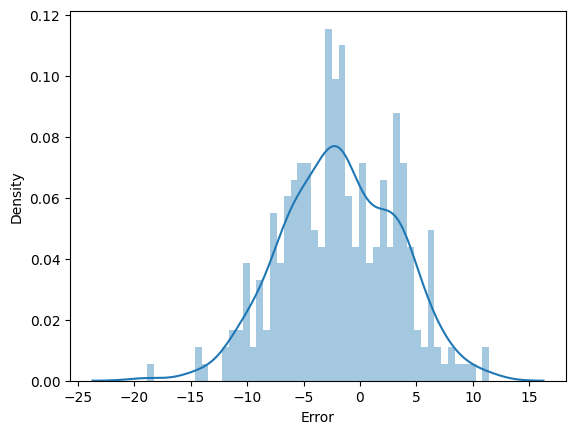

In [60]:
sns.distplot(pred_df['Error'], bins=50)

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [62]:
mean_absolute_error(pred_df['Test Y'], pred_df['Model Predictions'])

4.328470003594429

In [63]:
mean_squared_error(pred_df['Test Y'], pred_df['Model Predictions'])

28.308771282861198

In [64]:
test_score

28.30876922607422

In [65]:
test_score**0.5

5.320598577798763

In [66]:
new_gem = [[998, 1000]]

In [67]:
scaler.transform(new_gem)

array([[0.14117652, 0.53968792]])

In [68]:
model.predict(new_gem)

1/1 [==============================] - 0s 101ms/step


array([[734463.7]], dtype=float32)

In [69]:
from tensorflow.keras.models import load_model

In [71]:
model.save('my_model.h5')

In [72]:
later_model = load_model('my_model.h5')

In [73]:
later_model.predict(new_gem)

1/1 [==============================] - 0s 78ms/step


array([[734463.7]], dtype=float32)